In [39]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

b = 0.4
k = 4
m = 0.1
A = np.array([[0, 1], [-k / m, -b / m]])

t0 = 0
tf = 3
increment = 0.01
t = np.arange(t0, tf, increment)
x0 = [2, 0]


In [40]:
from types import SimpleNamespace


In [41]:
def solve_spring_damper(y0=x0, t=t, b=b, k=k, m=m):
    """solver for spring-damper system

    ----------
    ### Parameters
      `y0` : `np.array`
          initial value
      `t` : `np.array`
          time coordinates
      `args` : `[float, float, float]`
          `b` - damping coefficient,
          `k` - spring stiffness,
          `m` - mass

    -------
    ### Returns
      `np.array`
          solution to the system
    """
    A = np.array([[0, 1], [-k / m, -b / m]])

    def state_space(y, t):
        return np.dot(A, y)

    return odeint(func=state_space, y0=y0, t=t)


In [42]:
def solve_list(args):
    """solver for list of systems

    ----------
    ### Parameters
      `args` : `[[solver, arguments]]`

    -------
    ### Returns
      `[solutions]`


    -------
    ### Examples
    >>> sol = solve_list([[solve_spring_damper,{}], [solve_spring_damper,{"b": 4}]])
    """
    res = [None for i in range(len(args))]
    for i, (f, args) in enumerate(args):
        res[i] = f(**args)
    return res


In [43]:
def plot_sol(args):
    """plot separately list of systems

    -------
    ### Parameters
      `args` : `[dict]`
          `dict`
              `x` : `np.array`
              `y` : `np.array`
              `xlabel` : `str`
                  latex string
              `ylabel` : `str`
                  latex string
              `label` : `str`
                  latex string
              `color` : `str`
                  see [options](https://matplotlib.org/stable/gallery/color/named_colors.html)

    -------
    ### Returns
      `None`

    -------
    ### Examples
    >>> plot_sol([{'x': t, 'y' : x, 'color':'b', 'label':'x(t)', 'xlabel':'t', 'ylabel':'x'}])
    """

    def plot(
        ax=None, x=np.empty, y=np.empty, xlabel=None, ylabel=None, color="b", label=None
    ):
        ax.grid()
        ax.set(
            xlabel=(f"${xlabel}$" if xlabel else None),
            ylabel=(f"${ylabel}$" if ylabel else None),
        )
        ax.plot(x, y, color=color, label=(f"${label}$" if label else None))
        if label:
            ax.legend(loc="best")

    fig, ax = plt.subplots(1, len(args), figsize=(5 * len(args), 5))
    ax = np.array(ax).reshape(-1)
    fig.tight_layout(pad=4.0)

    for i, arg in enumerate(args):
        plot(ax[i], **arg)

    plt.show()


In [44]:
sol = solve_list([[solve_spring_damper, {}], [solve_spring_damper, {"b": 4}]])


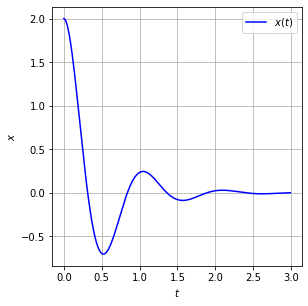

In [45]:
plot_sol(
    [
        {
            "x": t,
            "y": sol[0][:, 0],
            "color": "b",
            "label": "x(t)",
            "xlabel": "t",
            "ylabel": "x",
        }
    ]
)


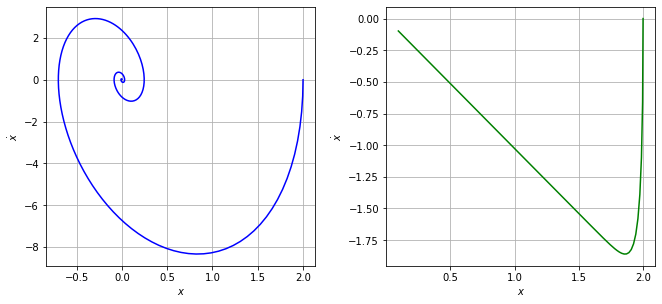

In [46]:
plot_sol(
    [
        {
            "x": sol[0][:, 0],
            "y": sol[0][:, 1],
            "color": "b",
            "xlabel": "x",
            "ylabel": "\dot x",
        },
        {
            "x": sol[1][:, 0],
            "y": sol[1][:, 1],
            "color": "g",
            "xlabel": "x",
            "ylabel": "\dot x",
        },
    ]
)
